I consider the ODE
\begin{equation}\tag{1}
\dot{h}(t) = \frac{1}{2}\left(-h(t) + \tanh\left(\frac{1}{2}\begin{pmatrix}2.9665h_x - 0.4471h_y \\ 0.4471h_x + 2.9665h_x\end{pmatrix}\right)\right)
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

In [23]:
def f(h, t):
    return [0.5*(-h[0] + np.tanh(2.9665 * h[0] - 0.4471 * h[1])), \
            0.5*(-h[1] + np.tanh(0.4471 * h[0]) + 2.9665 * h[1])]

def list_mul_2d(M, m):
    """ M is a list of lists. Multiply each one of them by m."""
    return [[m * x for x in L] for L in M]

def draw_phase_portrait(size1=1, size2 = 1, title_str='Phase portrait'):
    # Create the grid in the domain [-1, 1] x [-1, 1].
    lo, hi = -0.5*size1, 0.5*size1
    X, Y = np.meshgrid(np.linspace(lo, hi, 21), np.linspace(lo, hi, 21))
    u, v = np.zeros(X.shape), np.zeros(Y.shape)

    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            xp = f(np.array([X[i, j], Y[i, j]]), 0)
            u[i,j] = xp[0]
            v[i,j] = xp[1]
   
    Q = plt.quiver(X, Y, u, v, color='r')
        
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim([lo, hi])
    plt.ylim([lo, hi])
    x_inits = [[0.5, 0.5], [0.25, 0.5], [0, 0.5], [-0.25, 0.5], [-0.5, 0.5], \
              [-0.5, 0.25], [-0.5, 0], [-0.5, -0.25], [-0.5, -0.5], \
              [-0.25, -0.5], [0, -0.5], [0.25, -0.5], [0.5, -0.5], \
              [0.5, -0.25], [0.5, 0], [0.5, 0.25]]

    for x_init in list_mul_2d(x_inits, size2):  
        times = np.linspace(0, 500, 2000)  
        xs = odeint(f, x_init, times)
        plt.plot(xs[:,0], xs[:,1], '-', color = 'black') # path
        plt.plot([xs[0,0]], [xs[0,1]], 'o', markersize = 2) # start
        plt.plot([xs[-1,0]], [xs[-1,1]], 's', markersize = 4, color='blue') # end
        
    filename = f"{title_str.replace(' ', '_')}.png"
    plt.savefig(filename)
    plt.show()

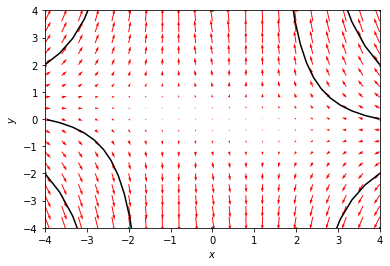

In [24]:
draw_phase_portrait(8, 8, 'Ex2 Stable points')

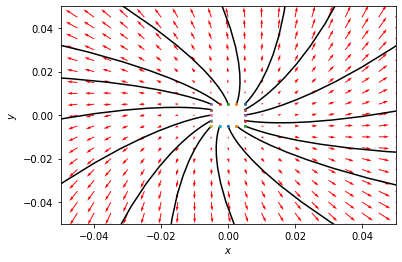

In [22]:
draw_phase_portrait(0.1, 0.01, 'Ex2 Unstable point')